# Twitter Sentiment Analysis: 2022 World Cup

Overview:
We're going to analyze people's perception of the 2022 FIFA World Cup from twitter & youtube with negative sentiment represented with label '1' and positive sentiment represented with label '0'. We use Logistic Regression algorithm to classify each tweets and comments.

Training Dataset Source: https://www.kaggle.com/datasets/ferno2/training1600000processednoemoticoncsv?resource=download

Testing dataset to get insight about the World Cup from Twitter API


# Step 1: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])

As we can see from the result below, the data is imbalanced. There are way more positive labeled tweets in comparison to the negatively labeled

In [3]:
#seeing the number of negative and positive labeled data
print("The shape of negative labeled tweets: ")
print(df[df['target'] == 0].shape)
print("The shape of positive labeled tweets: ")
print(df[df['target'] == 4].shape)

The shape of negative labeled tweets: 
(800000, 6)
The shape of positive labeled tweets: 
(800000, 6)


To prevent the bias towards positive labeling, we're sampling the positive labeled tweet to match the amount of the negative labeled tweets, 2242 tweets for each labels

In [4]:
df_label_one = df[df['target']==4]
df_label_one.drop(df_label_one.index[:-20000], axis=0, inplace=True)
df_label_one

df_label_zero = df[df['target']==0]
df_label_zero.drop(df_label_zero.index[:-20000], axis=0, inplace=True)
df_label_zero

frames_1 = [df_label_zero, df_label_one]
pd.set_option('display.max_rows', 10)
tweets_df= pd.concat(frames_1, ignore_index = True)

C:\Users\rangg\AppData\Local\Temp\ipykernel_19432\4268083722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_one.drop(df_label_one.index[:-20000], axis=0, inplace=True)
C:\Users\rangg\AppData\Local\Temp\ipykernel_19432\4268083722.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_zero.drop(df_label_zero.index[:-20000], axis=0, inplace=True)


In [5]:
print(df_label_one.shape)
print(df_label_zero.shape)

(20000, 6)
(20000, 6)


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  40000 non-null  int64 
 1   ids     40000 non-null  int64 
 2   date    40000 non-null  object
 3   flag    40000 non-null  object
 4   user    40000 non-null  object
 5   text    40000 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [7]:
tweets_df.describe()
tweets_df

,target,ids,date,flag,user,text
0,0,2323066693,Wed Jun 24 23:50:25 PDT 2009,NO_QUERY,iKarimah,talking to... no one
1,0,2323067072,Wed Jun 24 23:50:28 PDT 2009,NO_QUERY,PsychobillyCass,wanna listen to &quot;my girl&quot; but can't ...
2,0,2323067309,Wed Jun 24 23:50:30 PDT 2009,NO_QUERY,originald,"OK, finally threw everything out. Trying some..."
3,0,2323067331,Wed Jun 24 23:50:30 PDT 2009,NO_QUERY,pariahriot,My dumbass wiped the micro sd card I had in my...
4,0,2323067540,Wed Jun 24 23:50:31 PDT 2009,NO_QUERY,Rubyam,@HorseCrazyBoy1 oh apologies dear friend - i w...
...,...,...,...,...,...,...
39995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
39996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
39997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
39998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['ids'], axis=1)
tweets_df = tweets_df.drop(['date'], axis=1)
tweets_df = tweets_df.drop(['flag'], axis=1)
tweets_df = tweets_df.drop(['user'], axis=1)

tweets_df.rename(columns = {'target':'label'}, inplace = True)
tweets_df

,label,text
0,0,talking to... no one
1,0,wanna listen to &quot;my girl&quot; but can't ...
2,0,"OK, finally threw everything out. Trying some..."
3,0,My dumbass wiped the micro sd card I had in my...
4,0,@HorseCrazyBoy1 oh apologies dear friend - i w...
...,...,...
39995,4,Just woke up. Having no school is the best fee...
39996,4,TheWDB.com - Very cool to hear old Walt interv...
39997,4,Are you ready for your MoJo Makeover? Ask me f...
39998,4,Happy 38th Birthday to my boo of alll time!!! ...


# Step 2: Importing data from SQL Database

In [9]:
df_fwc = pd.read_csv('fwc.csv')
input_count = df_fwc.shape[0]

print(input_count)

400


We then combine the data from the dataset and the twitter API into df_all dataframe. This is important to ensure equal number of features for both dataset

The data from twitter API is not labeled. Therefore, for the sake of dataset completeness to make it possible to combine both dataframe, we assign all tweets with label '1'. This doesnt matter because the label won't be used as an input to the classifier model. It's done with the code below:

In [10]:
one_label = [1 for i in range(input_count)]
df_fwc['label'] = one_label #assigning all tweets with label '1'

# Combining model and testing dataset
frames = [tweets_df, df_fwc]
pd.set_option('display.max_rows', 10)
df_all= pd.concat(frames, ignore_index = True)
df_all

,label,text
0,0,talking to... no one
1,0,wanna listen to &quot;my girl&quot; but can't ...
2,0,"OK, finally threw everything out. Trying some..."
3,0,My dumbass wiped the micro sd card I had in my...
4,0,@HorseCrazyBoy1 oh apologies dear friend - i w...
...,...,...
40395,1,QatarWorldCup being accused of sports washing ...
40396,1,RT Cristiano Ronaldo is expected to make his 2...
40397,1,Ismaila Sarr has been one of the standout play...
40398,1,The World Cup 2022 is well under way in Qatar ...


# Step 3: Removing Punctuations and Stopwords

To ensure the value of each data, both the punctuations and stopwords will be removed

In [11]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rangg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Remove Punctuation and Stopwords
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [13]:
# Trying the function
df_all_cleaned = df_all['text'].apply(message_cleaning)

In [14]:
print(df_all_cleaned.iloc[-10]) # show the cleaned up version

['England', 'ends', 'Wales', 'World', 'Cup', 'hopes', 'winning', 'fans']


In [15]:
print(df_all.iloc[-10]['text']) # show the original version

England ends Wales World Cup hopes but there s no winning over their fans


# Step 4: Performing Vectorization

To ensure model fitting can happen, we convert the tweet data into vectors through vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(df_all['text'])
X_all = pd.DataFrame(tweets_countvectorizer.toarray())
print(X_all)

       0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
40395      0      0      0      0      0      0      0      0      0      0   
40396      0      0      0      0      0      0      0      0      0      0   
40397      0      0      0      0      0      0      0      0      0      0   
40398      0      0      0      0      0      0      0      0      0      0   
40399      0      0      0      0      0      0      0      0      0      0   

       ...  63472  63473  63474  63475  63476  6347

In [17]:
print(vectorizer.get_feature_names())


['0', '00', '000', '00000001', '000009260gbs', '00055gbmin', '002', '0055gb60sec', '007', '007peter', '00am', '00mony00', '00vicky00', '01', '0100', '02', '0210', '03', '0300', '03072009', '033gb60min', '033gbhour', '03xyou', '03xyoutumblrcom', '04', '05', '0500', '0530', '06', '0615', '06260407', '066', '07', '08', '08S26', '09', '0K', '0NLY', '0S', '0ff', '0kat0', '0o', '0sn', '0summerbreeze0', '0vary', '1', '10', '100', '1000', '10000', '1000000', '1000000giraffes', '10000th', '1000am', '1000b1', '1000m', '1000s', '1000th', '100100', '100I', '100mbit', '100pm', '100s', '100th', '100â\x82¬', '101', '1010', '10100', '10115', '1015', '1018', '1019', '102', '1020c', '1021pm', '1024', '1024x900', '1027', '1028am', '102F', '103', '1030', '1030330', '1030pm', '1033', '103weupcom', '104', '1040', '1041', '10411', '1041pm', '1045', '1045pm', '1046AM', '1047pm', '104th', '1050', '1051', '1052', '1053ughhhh', '106', '1067', '106th', '107', '10709', '1087', '108so', '109', '10K', '10am', '10day

c:\Users\rangg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Step 5: Train and Evaluate Logistic Regression Model

In [18]:
# We exclude the last 100 data since it contains the World Cup tweets that we're going to analyze
# We dont want the training model to access testing data
X_modeling = X_all[:-input_count]
y_modeling = df_all.iloc[:-input_count]['label']


In [19]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_modeling, y_modeling, test_size=0.1)


              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1972
           4       0.76      0.75      0.75      2028

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000



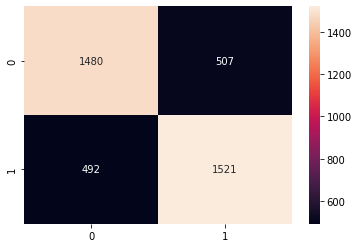

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Applying Logistic Regression model
model = LogisticRegression(solver='liblinear',C=10, penalty='l2', tol=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#Generating confusion Matrix and classification report
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')

print(classification_report(y_test, y_pred))

# Step 6: Applying the model to World Cup related tweets & comments

In [32]:
#Testing the model on World Cup tweets
print(input_count)
y_predict_fwc = model.predict(X_all[-input_count:])
df_all.iloc[-input_count:]['label'] = y_predict_fwc
df_fwc = df_all.iloc[-input_count:]
y_predict_fwc

400


C:\Users\rangg\AppData\Local\Temp\ipykernel_19432\1114248707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.iloc[-input_count:]['label'] = y_predict_fwc


array([4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 0,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 0,
       4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4,

In [33]:
print("The number of positive labeled tweets out of are : ")
print(len(y_predict_fwc[y_predict_fwc == 4]))
print("The number of negative labeled tweets out of are : ")
print(len(y_predict_fwc[y_predict_fwc == 0]))

The number of positive labeled tweets out of are : 
329
The number of negative labeled tweets out of are : 
71


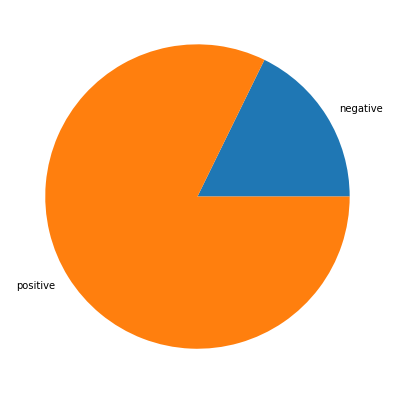

In [34]:
# Creating dataset
sentiment = [ 'negative', 'positive']
 
data = [len(y_predict_fwc[y_predict_fwc == 0]), len(y_predict_fwc[y_predict_fwc == 4])]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sentiment)
 
# show plot
plt.show()

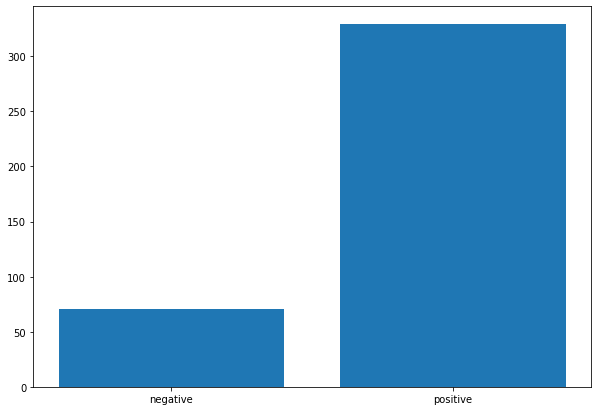

In [35]:
fig = plt.figure(figsize =(10, 7))
plt.bar(sentiment, data)
 
# show plot
plt.show()

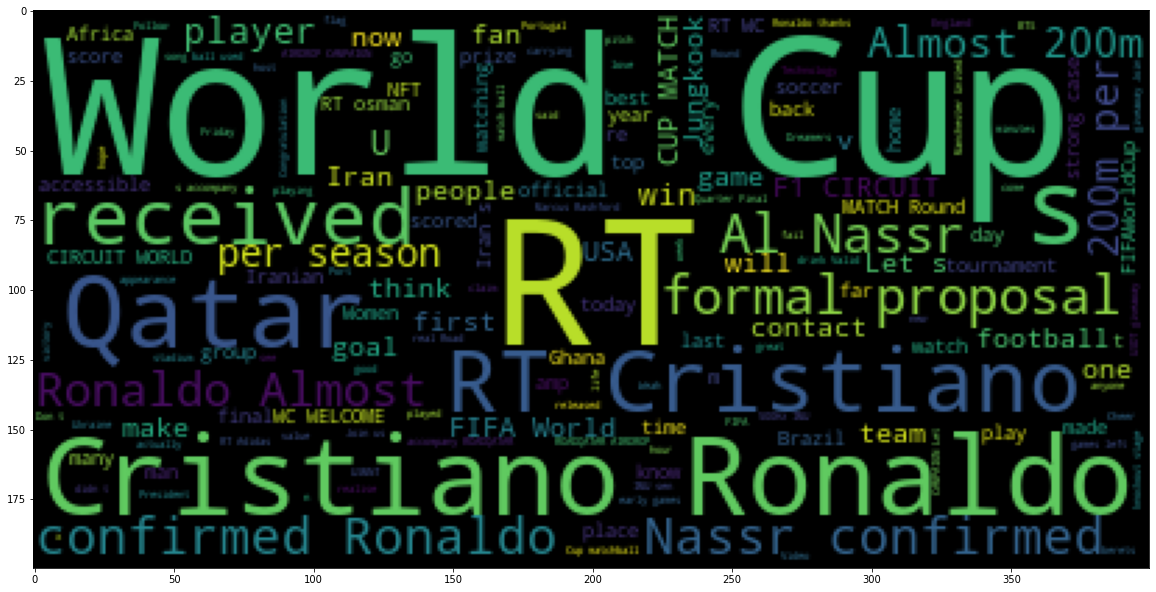

In [37]:
from wordcloud import WordCloud

sentences = df_fwc['text'].tolist()
sentence_as_one = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence_as_one))